In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/AI/ML-Fall2023/HW4

/content/drive/MyDrive/AI/ML-Fall2023/HW4


In [ ]:
ls

d1.csv  d2.csv


In [ ]:
df1 = pd.read_csv('d1.csv')
df2 = pd.read_csv('d2.csv')

print("Dataset 1:")
print(df1.head())

print("\nDataset 2:")
print(df2.head())

Dataset 1:
          x         y
0  0.438595  0.215316
1 -0.422453 -0.305440
2 -1.012481  0.047559
3  0.976358  0.038049
4 -1.016175 -0.277860

Dataset 2:
          x         y
0  0.064928  0.149214
1  1.294972 -0.457130
2  0.034000  0.937492
3  0.976778  0.021321
4 -0.200670  0.992690


In [ ]:
df1.shape

(1500, 2)

In [ ]:
df2.shape

(1500, 2)

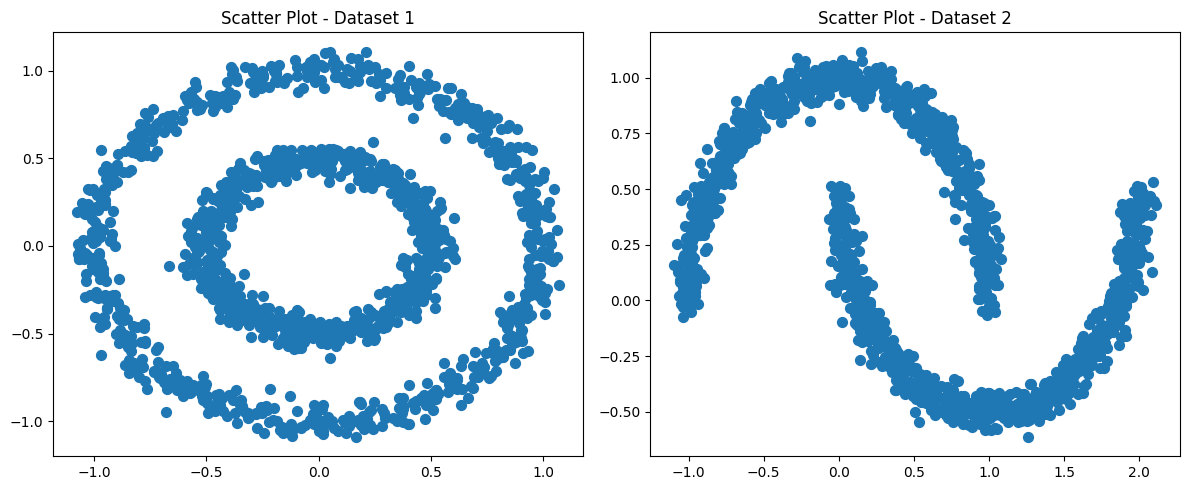

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df1['x'], df1['y'], marker='o', s=50)
plt.title('Scatter Plot - Dataset 1')

plt.subplot(1, 2, 2)
plt.scatter(df2['x'], df2['y'], marker='o', s=50)
plt.title('Scatter Plot - Dataset 2')

plt.tight_layout()
plt.show()

In [ ]:
first = df1[['x', 'y']].to_numpy()
second = df2[['x', 'y']].to_numpy()

so we see how our data is
using DBSCAN can make some good changes
we should the DBSCAN, and use some random hyperparameters, but before that, let's see what is DBSCAN exaclty

DBSCAN is designed to identify clusters in a dataset based on the density of data points in the feature space. Unlike some other clustering algorithms, DBSCAN doesn't require the number of clusters to be specified beforehand and can discover clusters of arbitrary shapes.

The algorithm categorizes data points into three types:

*    Core Point: A data point is considered a core point if there are at least min_samples data points (including itself) within a distance of eps from it.

*    Border Point: A data point is considered a border point if it is within a distance of eps from a core point but has fewer than min_samples data points within that distance.

*    Noise Point (Outlier): A data point that is neither a core point nor a border point.


Also, DBSCAN has two main hyper parameters:


*   Epsilon (ε): It defines the radius within which the algorithm searches for other data points to form a cluster.

*   MinPoints: It specifies the minimum number of data points required to form a dense region (cluster).



know it's time for coding 😆

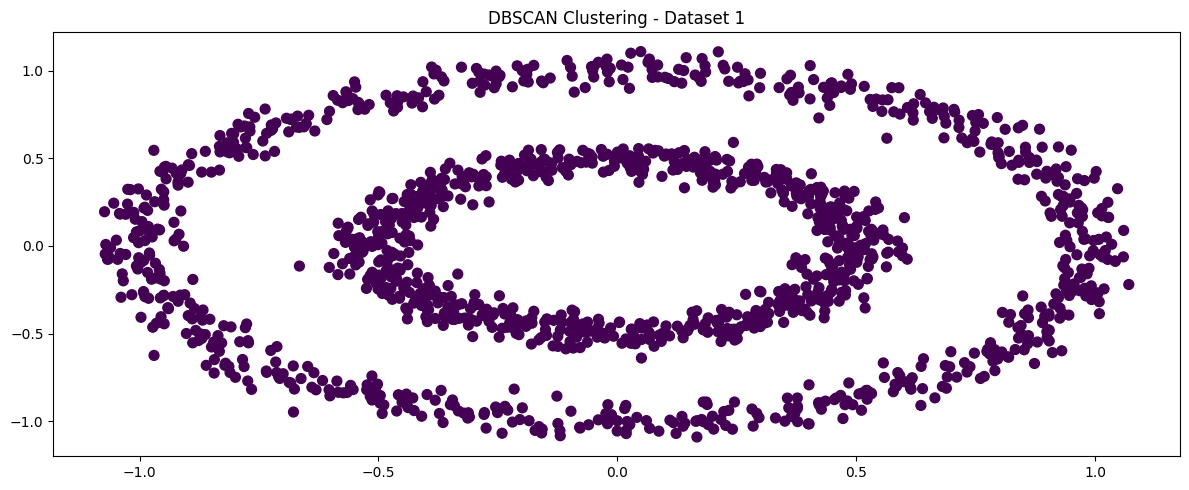

In [ ]:
from sklearn.cluster import DBSCAN


dbscan_model = DBSCAN(eps=1, min_samples=3)
clusters = dbscan_model.fit_predict(first)
clusters1 = apply_dbscan(first, epsilon, min_samples)

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
plt.scatter(df1['x'], df1['y'], c=clusters1, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering - Dataset 1')

plt.tight_layout()
plt.show()


strange!
all of them are the same color!

let's use a set of hyper parameters

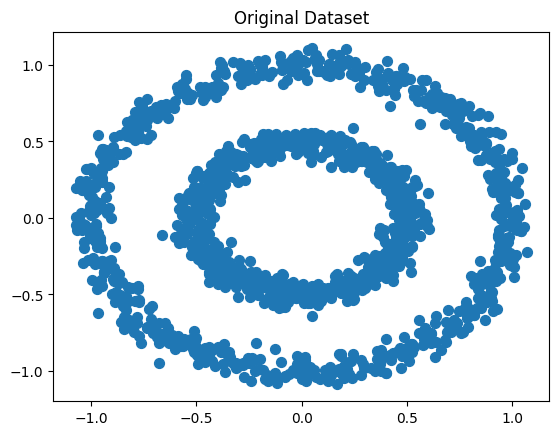

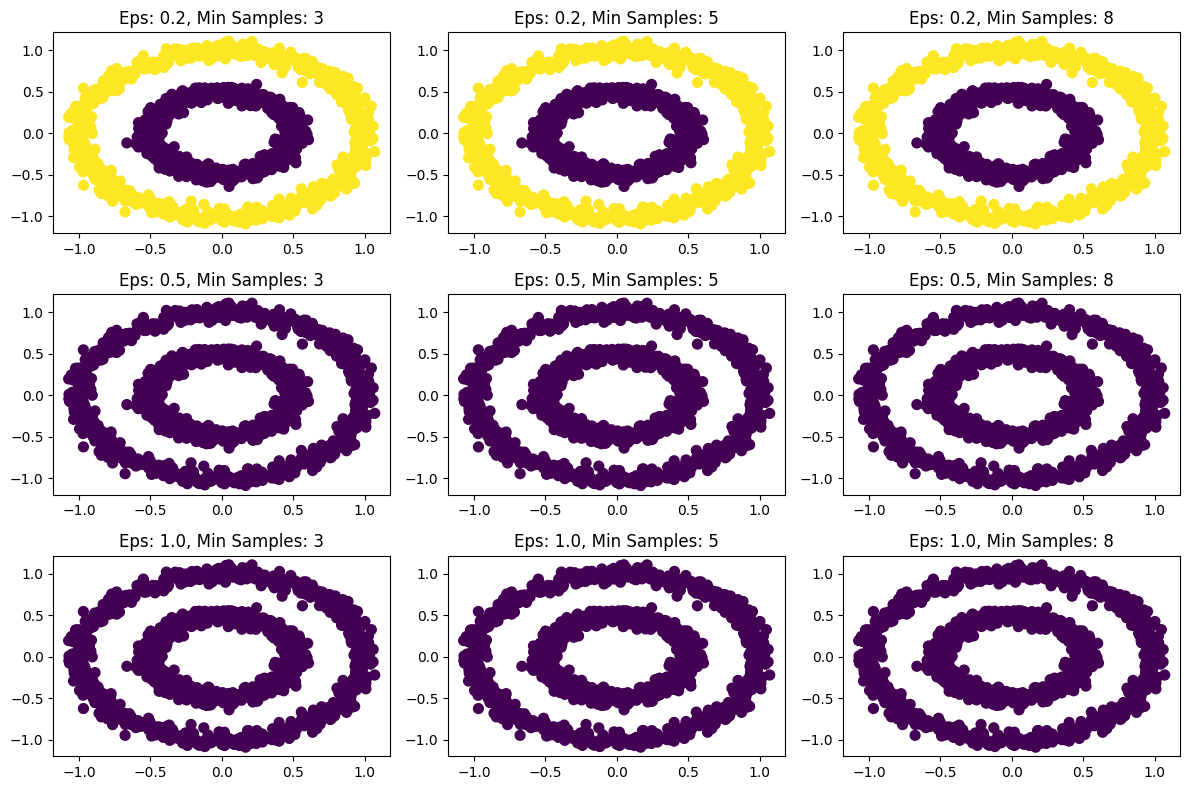

In [ ]:
epsilons = [0.2, 0.5, 1.0]
min_samples_values = [3, 5, 8]

plt.scatter(df1['x'], df1['y'], marker='o', s=50)
plt.title('Original Dataset')
plt.show()

rows = len(epsilons)
cols = len(min_samples_values)
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, epsilon in enumerate(epsilons):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        clusters = dbscan.fit_predict(df1[['x', 'y']])

        ax = axes[i, j] if rows > 1 else axes[j]
        scatter = ax.scatter(df1['x'], df1['y'], c=clusters, cmap='viridis', marker='o', s=50)
        ax.set_title(f'Eps: {epsilon}, Min Samples: {min_samples}')

plt.tight_layout()
plt.show()


amazing! so the one of the best hyper parameters for dataset1 can be epsilon radius of 0.2 and min samples of 5

now let's check the other dataset

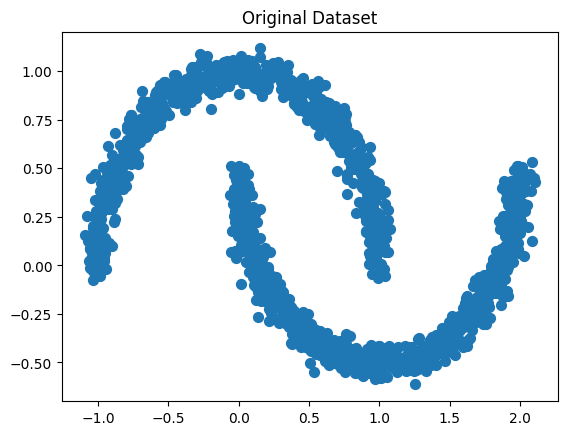

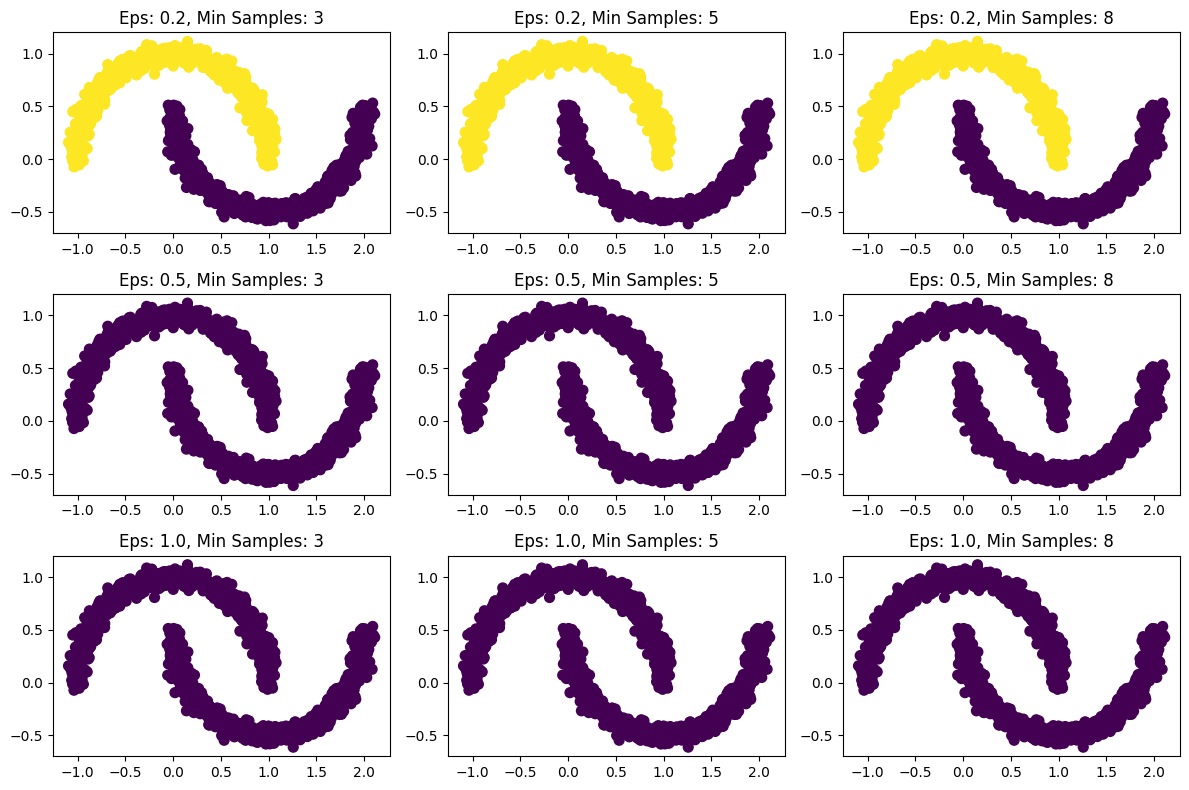

In [ ]:
epsilons = [0.2, 0.5, 1.0]
min_samples_values = [3, 5, 8]

plt.scatter(df2['x'], df2['y'], marker='o', s=50)
plt.title('Original Dataset')
plt.show()

rows = len(epsilons)
cols = len(min_samples_values)
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, epsilon in enumerate(epsilons):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        clusters = dbscan.fit_predict(df2[['x', 'y']])

        ax = axes[i, j] if rows > 1 else axes[j]
        scatter = ax.scatter(df2['x'], df2['y'], c=clusters, cmap='viridis', marker='o', s=50)
        ax.set_title(f'Eps: {epsilon}, Min Samples: {min_samples}')

plt.tight_layout()
plt.show()


wow! so nice, this one's best hyperparameters is like the first one

so let's draw everythin together one last time

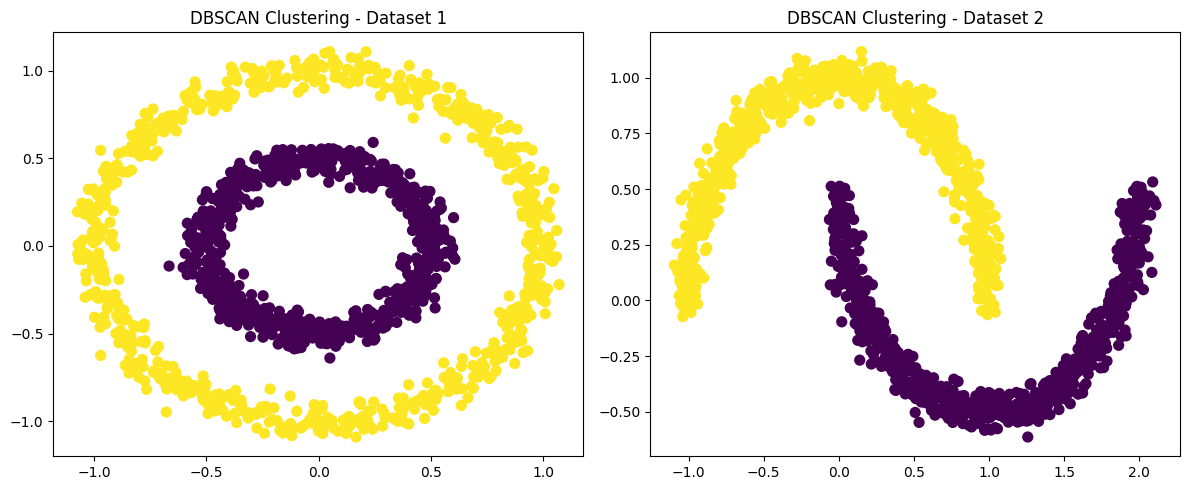

In [ ]:
def apply_dbscan(data, epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    return clusters

epsilon = 0.2
min_samples = 5

data1 = df1[['x', 'y']].to_numpy()
data2 = df2[['x', 'y']].to_numpy()

clusters1 = apply_dbscan(data1, epsilon, min_samples)
clusters2 = apply_dbscan(data2, epsilon, min_samples)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df1['x'], df1['y'], c=clusters1, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering - Dataset 1')

plt.subplot(1, 2, 2)
plt.scatter(df2['x'], df2['y'], c=clusters2, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering - Dataset 2')

plt.tight_layout()
plt.show()

That's it all for this coding assigment! goodbye 🙂✌